<a href="https://colab.research.google.com/github/Sergius-DS/elecciOn_datasets/blob/main/data_diabetes_Lat_Longitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data_diabetes_limpio_temp.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625956 entries, 0 to 625955
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FECHA_AFILIADOS_SIS   625956 non-null  object 
 1   CODIGO_ANONIMIZADO    625956 non-null  object 
 2   EDAD                  625956 non-null  int64  
 3   UBIGEO                625956 non-null  int64  
 4   DEPARTAMENTO          625956 non-null  object 
 5   PROVINCIA             625956 non-null  object 
 6   DISTRITO              625956 non-null  object 
 7   SEXO                  625956 non-null  object 
 8   FECHA_PRIMER_DX       625956 non-null  object 
 9   TIPO_DIABETES         625956 non-null  object 
 10  CON_DX_OBESIDAD       625956 non-null  int64  
 11  CON_DX_HIPERTENSION   625956 non-null  int64  
 12  CON_DX_SALUDMENTAL    625956 non-null  int64  
 13  CANT_ATENCIONES       625956 non-null  int64  
 14  VALOR_NETO            625956 non-null  float64
 15  

In [4]:
data.head(4)

,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud
0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,MASCULINO,2018-01-05,Diabetes mellitus tipo 2,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15
1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,MASCULINO,2018-08-09,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69
2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,FEMENINO,2018-02-09,Diabetes mellitus no especificada,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50
3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,FEMENINO,2023-01-17,Diabetes mellitus tipo 2,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08


In [5]:
data[data['CODIGO_ANONIMIZADO'].duplicated()].count()

,0
FECHA_AFILIADOS_SIS,0
CODIGO_ANONIMIZADO,0
EDAD,0
UBIGEO,0
DEPARTAMENTO,0
PROVINCIA,0
DISTRITO,0
SEXO,0
FECHA_PRIMER_DX,0
TIPO_DIABETES,0


In [6]:
data['EDAD'].describe()

,EDAD
count,625956.00
mean,55.89
std,16.95
min,0.00
25%,46.00
50%,57.00
75%,68.00
max,119.00


In [7]:
data = data.dropna(subset=['latitud', 'longitud'])

In [8]:
data = data.reset_index()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 623867 non-null  int64  
 1   FECHA_AFILIADOS_SIS   623867 non-null  object 
 2   CODIGO_ANONIMIZADO    623867 non-null  object 
 3   EDAD                  623867 non-null  int64  
 4   UBIGEO                623867 non-null  int64  
 5   DEPARTAMENTO          623867 non-null  object 
 6   PROVINCIA             623867 non-null  object 
 7   DISTRITO              623867 non-null  object 
 8   SEXO                  623867 non-null  object 
 9   FECHA_PRIMER_DX       623867 non-null  object 
 10  TIPO_DIABETES         623867 non-null  object 
 11  CON_DX_OBESIDAD       623867 non-null  int64  
 12  CON_DX_HIPERTENSION   623867 non-null  int64  
 13  CON_DX_SALUDMENTAL    623867 non-null  int64  
 14  CANT_ATENCIONES       623867 non-null  int64  
 15  

In [10]:
data.head(24)

,index,FECHA_AFILIADOS_SIS,CODIGO_ANONIMIZADO,EDAD,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,FECHA_PRIMER_DX,TIPO_DIABETES,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL,CANT_ATENCIONES,VALOR_NETO,CANT_ATENCIONES_HOSP,VALOR_NETO_HOSP,DIAS_HOSP,HOSPITALIZADO,UBICACION,latitud,longitud
0,0,2023-09-30,000015CA7003D37272A17DE250F6AFE9339F487360EC50...,75,70101,CALLAO,CALLAO,CALLAO,MASCULINO,2018-01-05,Diabetes mellitus tipo 2,1,1,0,1,6.60,0,0.00,0,0,CALLAO-CALLAO-CALLAO,-12.06,-77.15
1,1,2023-03-31,0000249BA42728EB9AF192293384E60E78449CE1DDA27A...,62,110106,ICA,ICA,PARCONA,MASCULINO,2018-08-09,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,ICA-ICA-PARCONA,-14.05,-75.69
2,2,2023-09-30,000031B49CE1B8437CF896A1D20A1E7A5048DE00952634...,55,40112,AREQUIPA,AREQUIPA,PAUCARPATA,FEMENINO,2018-02-09,Diabetes mellitus no especificada,0,1,1,5,53.67,0,0.00,0,0,AREQUIPA-AREQUIPA-PAUCARPATA,-16.43,-71.50
3,3,2023-03-31,000088EB332F5E7B13C522719F24EDC16A12FC1245B405...,56,150125,LIMA,LIMA,PUENTE PIEDRA,FEMENINO,2023-01-17,Diabetes mellitus tipo 2,1,0,0,2,0.00,0,0.00,0,0,LIMA-LIMA-PUENTE PIEDRA,-11.87,-77.08
4,4,2023-03-31,0000AD2FC5F5176DF573CE912D47FB0E1AF58917E81C64...,78,60101,CAJAMARCA,CAJAMARCA,CAJAMARCA,FEMENINO,2021-11-26,Diabetes mellitus tipo 2,0,0,0,0,0.00,0,0.00,0,0,CAJAMARCA-CAJAMARCA-CAJAMARCA,-7.15,-78.51
5,5,2023-09-30,0000AF228977E483FF7032A038D723921081DC6BEB1180...,18,70102,CALLAO,CALLAO,BELLAVISTA,FEMENINO,2023-05-29,Diabetes mellitus tipo 1,0,0,0,2,187.72,0,0.00,0,0,CALLAO-CALLAO-BELLAVISTA,-12.06,-77.13
6,6,2023-03-31,0000DF2C9636FA3650CFB9096B8D52ED7C00DEC8A8D390...,65,250301,UCAYALI,PADRE ABAD,PADRE ABAD,FEMENINO,2018-12-29,Diabetes mellitus no especificada,1,1,1,0,0.00,0,0.00,0,0,UCAYALI-PADRE ABAD-PADRE ABAD,-9.03,-75.51
7,7,2023-09-30,0000F157F4A508199E7AB5BC2C578CF314619454313BAA...,63,150112,LIMA,LIMA,INDEPENDENCIA,FEMENINO,2018-05-25,Diabetes mellitus tipo 2,1,1,0,2,220.20,0,0.00,0,0,LIMA-LIMA-INDEPENDENCIA,-12.00,-77.05
8,8,2023-03-31,000138461C3A7C68629B8C5ADAA0757E965110359CA37D...,66,150103,LIMA,LIMA,ATE,MASCULINO,2022-02-10,Diabetes mellitus no especificada,0,0,0,0,0.00,0,0.00,0,0,LIMA-LIMA-ATE,-12.03,-76.92
9,9,2023-03-31,0001B1D9CC72BC992B421521545684AB689714B14E539F...,70,150801,LIMA,HUAURA,HUACHO,FEMENINO,2018-09-11,Diabetes mellitus tipo 2,1,0,0,0,0.00,0,0.00,0,0,LIMA-HUAURA-HUACHO,-11.11,-77.61


In [11]:
data.drop('index', axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623867 entries, 0 to 623866
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FECHA_AFILIADOS_SIS   623867 non-null  object 
 1   CODIGO_ANONIMIZADO    623867 non-null  object 
 2   EDAD                  623867 non-null  int64  
 3   UBIGEO                623867 non-null  int64  
 4   DEPARTAMENTO          623867 non-null  object 
 5   PROVINCIA             623867 non-null  object 
 6   DISTRITO              623867 non-null  object 
 7   SEXO                  623867 non-null  object 
 8   FECHA_PRIMER_DX       623867 non-null  object 
 9   TIPO_DIABETES         623867 non-null  object 
 10  CON_DX_OBESIDAD       623867 non-null  int64  
 11  CON_DX_HIPERTENSION   623867 non-null  int64  
 12  CON_DX_SALUDMENTAL    623867 non-null  int64  
 13  CANT_ATENCIONES       623867 non-null  int64  
 14  VALOR_NETO            623867 non-null  float64
 15  

In [13]:
df_limpio = data.copy()

# 3. Normalizacion de datos

DATA FEATURING

Creamos una función *valores_unicos* para ver la frecuencia y porcentaje de los valores únicos de cada columna categórica

In [14]:
def valores_unicos(df, c):
    # Contar las frecuencias de los valores únicos
    frecuencias = df[c].dropna().value_counts()

    # Calcular el porcentaje para cada valor único
    total = frecuencias.sum()
    porcentajes = (frecuencias / total) * 100

    # Mostrar los valores únicos, sus frecuencias y porcentajes
    resultado = pd.DataFrame({
        'Frecuencia': frecuencias,
        'Porcentaje': porcentajes,
    })
    # Formatear la columna de porcentaje
    resultado['Porcentaje'] = resultado['Porcentaje'].map(lambda x: f"{x:.2f}%")

    print(resultado)

In [15]:
valores_unicos(df_limpio, 'SEXO')

           Frecuencia Porcentaje
SEXO                            
FEMENINO       410695     65.83%
MASCULINO      213172     34.17%


In [16]:
valores_unicos(df_limpio, 'HOSPITALIZADO')

               Frecuencia Porcentaje
HOSPITALIZADO                       
0                  606974     97.29%
1                   16893      2.71%


In [17]:
valores_unicos(df_limpio, 'TIPO_DIABETES')

                                             Frecuencia Porcentaje
TIPO_DIABETES                                                     
Diabetes mellitus tipo 2                         446581     71.58%
Diabetes mellitus  no especificada               135653     21.74%
Diabetes mellitus tipo 1                          32623      5.23%
Otras Diabetes mellitus especificada               7629      1.22%
Diabetes mellitus asociada con desnutrición        1381      0.22%


# 4. Análisis Exploratorio (EDA)

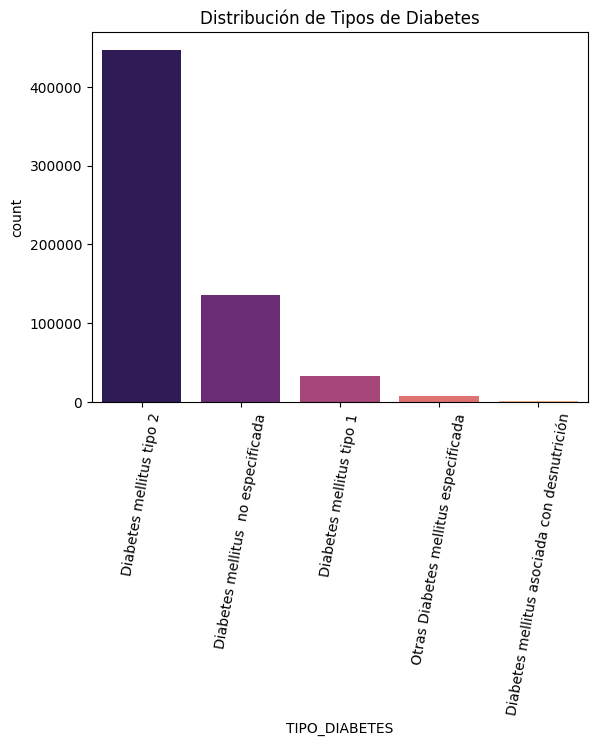

In [18]:
sns.countplot(data=df_limpio, x='TIPO_DIABETES',palette="magma")
plt.title('Distribución de Tipos de Diabetes')
plt.xticks(rotation=80)

plt.show()

In [19]:
# Convert 'FECHA_PRIMER_DX' to datetime objects
df_limpio['FECHA_PRIMER_DX'] = pd.to_datetime(df_limpio['FECHA_PRIMER_DX'])


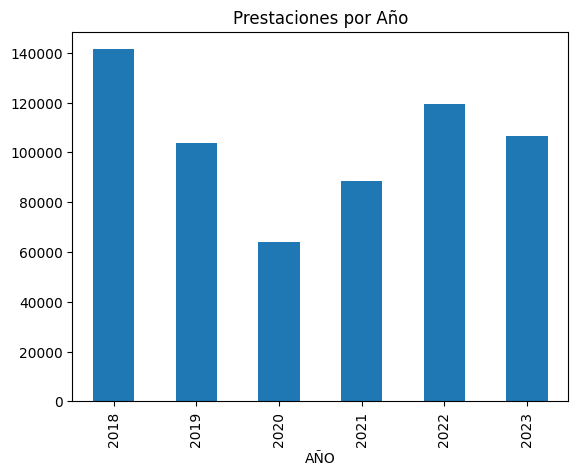

In [20]:
df_limpio['AÑO'] = df_limpio['FECHA_PRIMER_DX'].dt.year
prestaciones_por_año = df_limpio.groupby('AÑO').size()
prestaciones_por_año.plot(kind='bar', title="Prestaciones por Año")
plt.show()

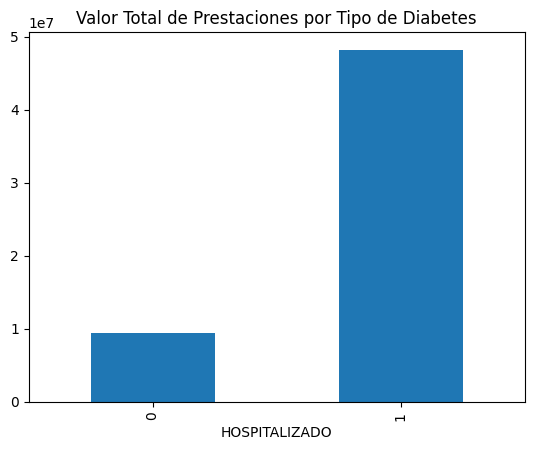

In [21]:
prestaciones_por_tipo = df_limpio.groupby('HOSPITALIZADO')['VALOR_NETO'].sum()
prestaciones_por_tipo.plot(kind='bar', title="Valor Total de Prestaciones por Tipo de Diabetes")
plt.show()


In [22]:
df_limpio.groupby('HOSPITALIZADO')['VALOR_NETO'].sum()

,VALOR_NETO
HOSPITALIZADO,
0,9415660.81
1,48207442.49


In [23]:
df_limpio.HOSPITALIZADO.value_counts()

,count
HOSPITALIZADO,
0,606974
1,16893


In [24]:
valores_unicos(df_limpio, 'VALOR_NETO')

            Frecuencia Porcentaje
VALOR_NETO                       
0.00            450291     72.18%
3.60              3401      0.55%
1.92              3136      0.50%
3.84              2956      0.47%
1.80              2366      0.38%
...                ...        ...
161486.28            1      0.00%
18582.61             1      0.00%
486.31               1      0.00%
502.62               1      0.00%
386.49               1      0.00%

[40924 rows x 2 columns]


In [25]:
# Si la edad del paciente está disponible, reasignar
diabetes_no_esp = df_limpio[(df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus  no especificada') ]
diabetes_no_esp.shape

(135653, 23)

In [26]:
diabetes_no_esp.EDAD.mean()

54.05573780159672

In [27]:
diabetes_no_esp.EDAD.value_counts()

,count
EDAD,
57,3209
58,3187
54,3089
64,3081
53,3061
...,...
105,3
104,2
109,1


In [28]:
# Guarda la muestra en un nuevo archivo CSV para usar en Power BI
#df_limpio.to_csv('data_diabetes_limpio.csv', index=False)


In [29]:
diabetes_tipo2 = df_limpio[(df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus tipo 2') ]
diabetes_tipo2.EDAD.mean()

56.61663841497959

In [30]:
diabetes_tipo1 = df_limpio[(df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus tipo 1') ]
diabetes_tipo1.EDAD.mean()

54.43227171014315

In [31]:
diabetes_no_esp[['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL']].agg(['mean', 'sum'])

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL
mean,0.59,0.33,0.21
sum,79717.00,45220.00,28277.00


In [32]:
diabetes_tipo1[['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL']].agg(['mean', 'sum'])

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL
mean,0.51,0.41,0.23
sum,16760.00,13364.00,7652.00


In [33]:
diabetes_tipo2[['CON_DX_OBESIDAD', 'CON_DX_HIPERTENSION', 'CON_DX_SALUDMENTAL']].agg(['mean', 'sum'])

,CON_DX_OBESIDAD,CON_DX_HIPERTENSION,CON_DX_SALUDMENTAL
mean,0.64,0.37,0.21
sum,284145.00,167250.00,91670.00


In [34]:
len(diabetes_tipo2)

446581

In [41]:
probabilidades = [0.93, 0.07]  # Proporción basada en los datos (71.64% tipo 2 y 5.22% tipo 1 normalizadas)
condiciones = df_limpio['TIPO_DIABETES'] == 'Diabetes mellitus  no especificada'
df_limpio.loc[condiciones, 'TIPO_DIABETES'] = np.random.choice(
    ['Diabetes mellitus tipo 2', 'Diabetes mellitus tipo 1'],
    size=condiciones.sum(),
    p=probabilidades
)

OBSERVACIONES:

Total de casos considerados para la elección aleatoria = 446581 (tipo 2) + 32623 (tipo 1) = 479204

Probabilidad para el tipo 2: 446581 / 479204 ≈ 0,93

Probabilidad para el tipo 1: 32623 / 479204 ≈ 0,07

Dado que estas coinciden con las probabilidades de entrada ([0,93, 0,07]), su configuración en este sentido es adecuada.

In [44]:
valores_unicos(df_limpio, 'TIPO_DIABETES')

                                             Frecuencia Porcentaje
TIPO_DIABETES                                                     
Diabetes mellitus tipo 2                         572715     91.80%
Diabetes mellitus tipo 1                          42142      6.75%
Otras Diabetes mellitus especificada               7629      1.22%
Diabetes mellitus asociada con desnutrición        1381      0.22%


In [43]:
print(df_limpio['TIPO_DIABETES'].unique())

['Diabetes mellitus tipo 2' 'Diabetes mellitus tipo 1'
 'Otras Diabetes mellitus especificada'
 'Diabetes mellitus asociada con desnutrición']


In [36]:
#df_limpio.to_csv('data_diabetes_limpio.csv', index=False)

In [37]:
#diabetes_no_esp.VALOR_NETO.sum()

In [38]:
#diabetes_tipo1.VALOR_NETO.sum()

In [39]:
#diabetes_tipo2.VALOR_NETO.sum()